### **Classic Start**

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Load databases

In [2]:
demo_phq = pd.read_csv('DEMO_PHQ.csv')

pag_hei = pd.read_csv('PAG_HEI.csv')

Take a look on the information in each database

In [3]:
demo_phq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [4]:
demo_phq.head(5)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [5]:
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [6]:
pag_hei.head(5)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


Merge databases considering the SEQN number

In [7]:
merged_data = pd.merge(demo_phq, pag_hei)

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

In [9]:
merged_data.head(5)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


### **Data Handling**

Replace codes that match categories with no information (7, 77, 9 and 99) for missing values

In [10]:
replace_map = {
  "DPQ010": {7: np.nan, 9: np.nan},
  "DPQ020": {7: np.nan, 9: np.nan},
  "DPQ030": {7: np.nan, 9: np.nan},
  "DPQ040": {7: np.nan, 9: np.nan},
  "DPQ050": {7: np.nan, 9: np.nan},
  "DPQ060": {7: np.nan, 9: np.nan},
  "DPQ070": {7: np.nan, 9: np.nan},
  "DPQ080": {7: np.nan, 9: np.nan},
  "DPQ090": {7: np.nan, 9: np.nan},
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "INDFMINC": {77: np.nan, 99: np.nan}
}

df1 = merged_data.replace(replace_map)

Missing values analysis

In [11]:
df1.isna().sum().sort_values(ascending=False)

DPQ080                      507
DPQ010                      507
DPQ030                      505
DPQ020                      503
DPQ040                      503
DPQ060                      503
DPQ050                      502
DPQ070                      502
DPQ090                      500
HEI2015C5_WHOLEGRAIN        274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015_TOTAL_SCORE         274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C11_REFINEDGRAIN     274
HEI2015C10_SODIUM           274
HEI2015C9_FATTYACID         274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015C8_SEAPLANT_PROT     274
INDFMINC                    160
DMDEDUC                       8
SEQN                          0
ADHERENCE                     0
RIDRETH1                      0
RIDAGEYR                      0
RIAGENDR                      0
PAG_MINW                      0
dtype: i

In [12]:
100*df1.isna().sum().sort_values(ascending=False)/df1.shape[0]

DPQ080                      9.505062
DPQ010                      9.505062
DPQ030                      9.467567
DPQ020                      9.430071
DPQ040                      9.430071
DPQ060                      9.430071
DPQ050                      9.411324
DPQ070                      9.411324
DPQ090                      9.373828
HEI2015C5_WHOLEGRAIN        5.136858
HEI2015C3_TOTALFRUIT        5.136858
HEI2015C4_WHOLEFRUIT        5.136858
HEI2015_TOTAL_SCORE         5.136858
HEI2015C6_TOTALDAIRY        5.136858
HEI2015C7_TOTPROT           5.136858
HEI2015C1_TOTALVEG          5.136858
HEI2015C2_GREEN_AND_BEAN    5.136858
HEI2015C11_REFINEDGRAIN     5.136858
HEI2015C10_SODIUM           5.136858
HEI2015C9_FATTYACID         5.136858
HEI2015C12_SFAT             5.136858
HEI2015C13_ADDSUG           5.136858
HEI2015C8_SEAPLANT_PROT     5.136858
INDFMINC                    2.999625
DMDEDUC                     0.149981
SEQN                        0.000000
ADHERENCE                   0.000000
R

As the missing percentage is below 10% for all variables, we will not do any treatment for missing cases.

Compute the PHQ-9 Score

In [13]:
df1['PHQ9_TOTAL_SCORE'] = df1[['DPQ010', 
                                'DPQ020', 
                                'DPQ030', 
                                'DPQ040', 
                                'DPQ050', 
                                'DPQ060', 
                                'DPQ070', 
                                'DPQ080', 
                                'DPQ090']].sum(axis = 'columns', skipna = False)

In [14]:
df1['PHQ9_TOTAL_SCORE'].describe()

count    4799.000000
mean        2.732236
std         3.727676
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: PHQ9_TOTAL_SCORE, dtype: float64

Classification of scores according to the literature

In [15]:
PHQ9_classes = [
  (df1['PHQ9_TOTAL_SCORE'].isna()),
  (df1['PHQ9_TOTAL_SCORE'] <= 5),
  (df1['PHQ9_TOTAL_SCORE'] > 5) & (df1['PHQ9_TOTAL_SCORE'] <= 9),
  (df1['PHQ9_TOTAL_SCORE'] > 9) & (df1['PHQ9_TOTAL_SCORE'] <= 14),
  (df1['PHQ9_TOTAL_SCORE'] > 14) & (df1['PHQ9_TOTAL_SCORE'] <= 19),
  (df1['PHQ9_TOTAL_SCORE'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

df1['PHQ9_CLASSIFICATION'] = np.select(PHQ9_classes, values)

df1[['PHQ9_CLASSIFICATION']].value_counts(sort = False)

PHQ9_CLASSIFICATION
0.0                    4013
1.0                     489
2.0                     201
3.0                      73
4.0                      23
Name: count, dtype: int64

### **Univariate Exploratory Data Analysis**

Selecting numeric variables

In [16]:
numeric_variable = [
    'PHQ9_TOTAL_SCORE',
    'RIDAGEYR',
    'INDFMINC',
    'PAG_MINW',
    'HEI2015C1_TOTALVEG',
    'HEI2015C2_GREEN_AND_BEAN',
    'HEI2015C3_TOTALFRUIT',
    'HEI2015C4_WHOLEFRUIT',
    'HEI2015C5_WHOLEGRAIN',
    'HEI2015C6_TOTALDAIRY',
    'HEI2015C7_TOTPROT',
    'HEI2015C8_SEAPLANT_PROT',
    'HEI2015C9_FATTYACID',
    'HEI2015C10_SODIUM',
    'HEI2015C11_REFINEDGRAIN',
    'HEI2015C12_SFAT',
    'HEI2015C13_ADDSUG',
    'HEI2015_TOTAL_SCORE',
]

Selecting categorical variables and defining labels

In [17]:

categorical_variable = [
    'RIAGENDR',
    'RIDRETH1',
    'DMDEDUC',
    'ADHERENCE',
    'PHQ9_CLASSIFICATION'
]

label_cat_var = {
  'RIAGENDR': {1: 'Male', 2: 'Female'},
  'RIDRETH1': {1: 'Non-hispanic \n white', 2: 'Non-hispanic \n black',
               3: 'Mexican \n american', 4: 'Other', 5: 'Other \n hispanic'},
  'DMDEDUC': {1: '< 9th \n grade', 2: '9-12th \n grade', 3: 'High \n school',
              4: 'Uncomplete \n higher education', 5: 'Complete \n higher education'},
  'ADHERENCE': {1: 'Low', 2: 'Adequate', 3: 'Above'},
  'PHQ9_CLASSIFICATION': {0: '0:None-minimal', 1: '1:Mild',
               2: '2:Moderate', 3: '3:Moderately \n severe', 4: '4:Severe'}
}

### **Numeric Variables Analysis**

In [18]:
df1[numeric_variable].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,PHQ9_TOTAL_SCORE,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4799.00,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,2.73,45.09,6.92,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,3.73,20.15,3.14,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
1%,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,24.68
25%,0.00,27.00,4.00,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,1.00,43.00,7.00,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,4.00,62.00,10.00,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
99%,17.00,85.00,12.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,27.00,85.00,13.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


Considering that a week has a maximum of 168 hours (10,080 minutes), the maximum value of 10,777 minutes in PAG_MINW (time of moderate aerobic activity) is an outlier. Based on this, we will truncate this variable to 3,000 min (50 hours per week).

In [19]:
df1['PAG_MINW_trunc'] = np.where(df1['PAG_MINW'] > 3000, 3000, df1['PAG_MINW'])
df1[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,446.88
std,780.35,628.18
min,0.00,0.00
1%,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
99%,3672.06,3000.00
max,10777.83,3000.00


Replacing 'PAG_MINW' in 'numeric_variable' for 'PAG_MINW_trunc':

In [20]:
for i in range(len(numeric_variable)):
    if numeric_variable[i] == 'PAG_MINW':
        numeric_variable[i] = 'PAG_MINW_trunc'

print(numeric_variable)


['PHQ9_TOTAL_SCORE', 'RIDAGEYR', 'INDFMINC', 'PAG_MINW_trunc', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']


Construction of Histograms

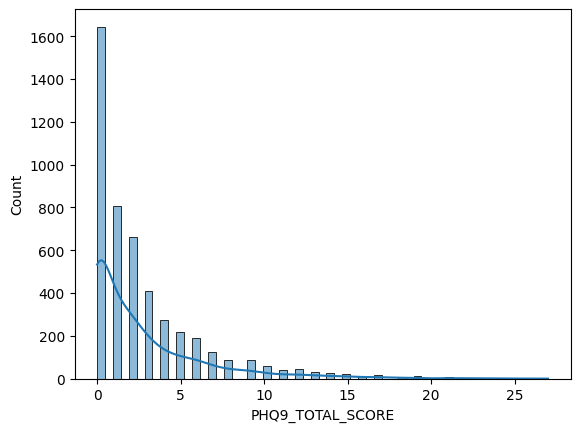

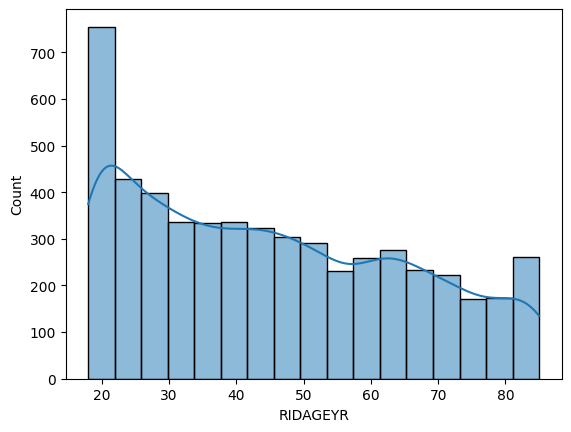

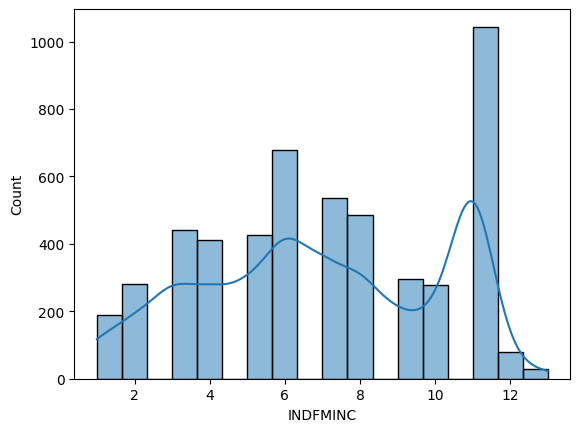

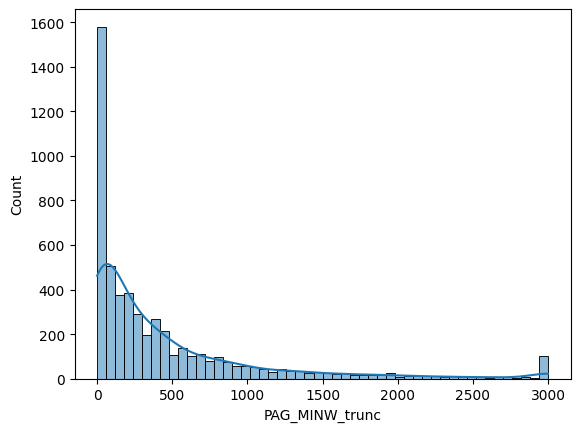

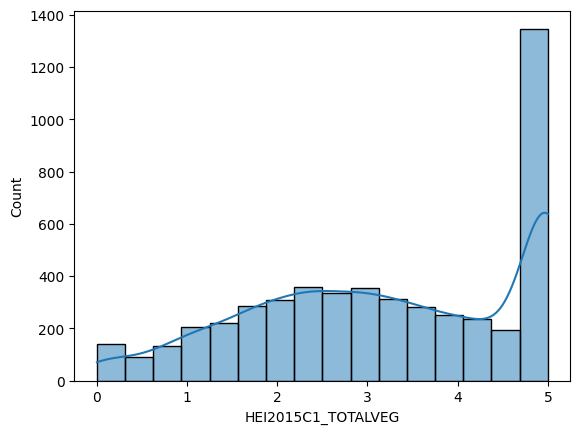

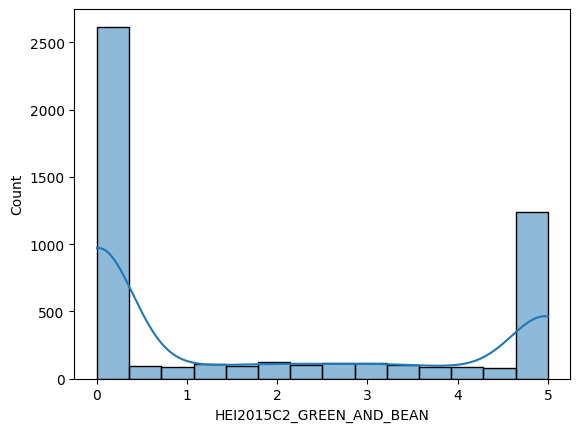

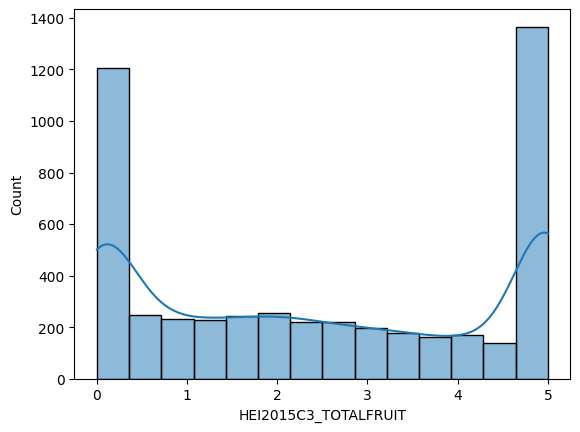

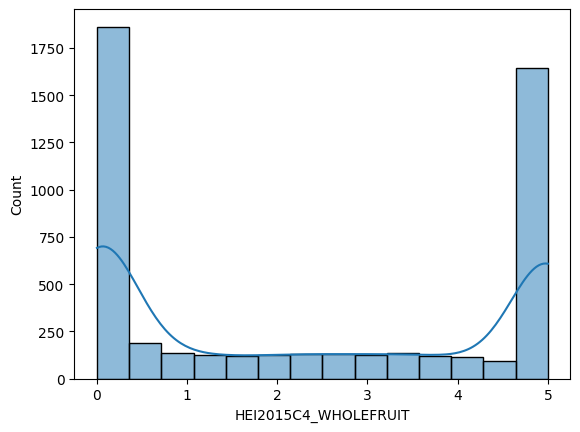

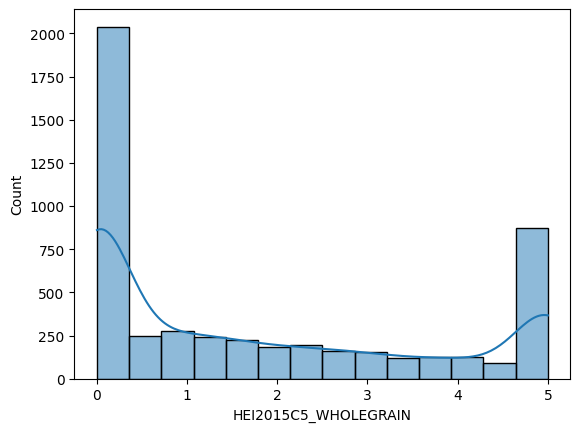

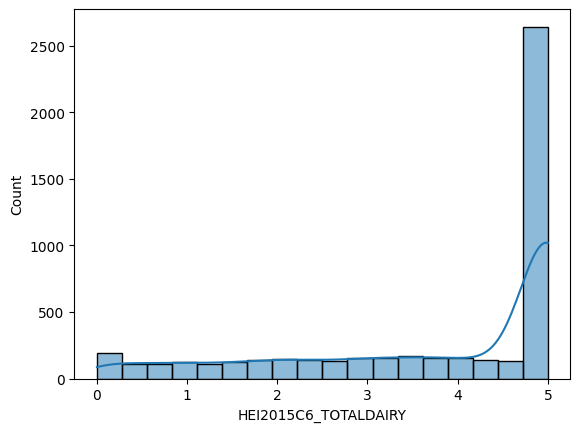

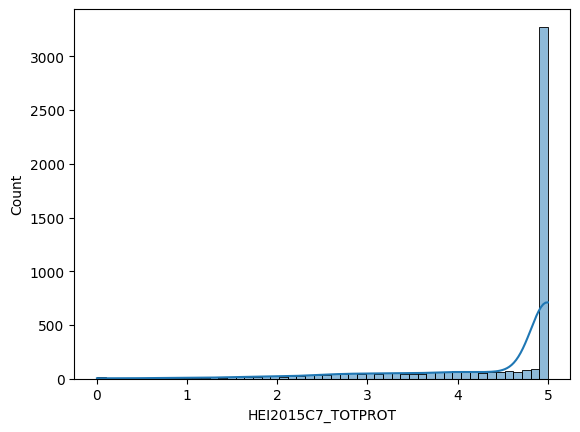

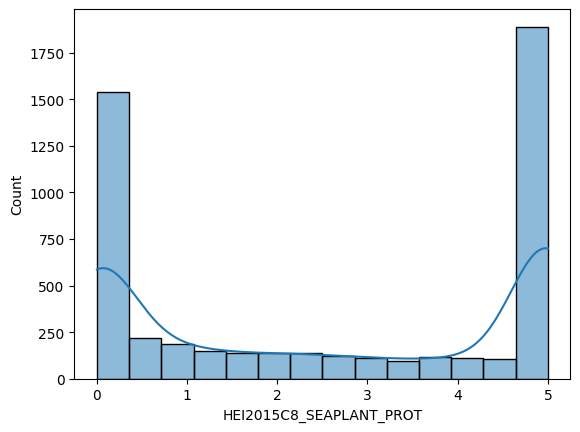

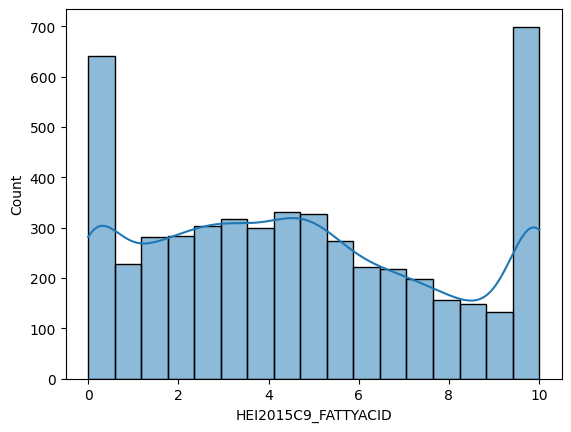

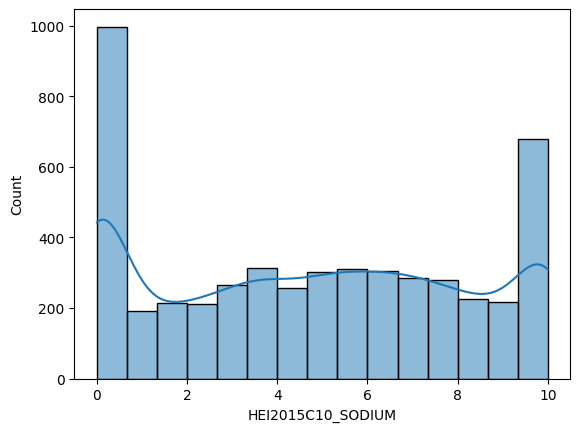

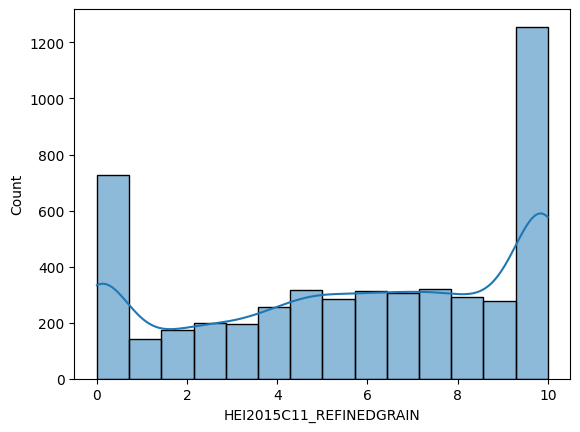

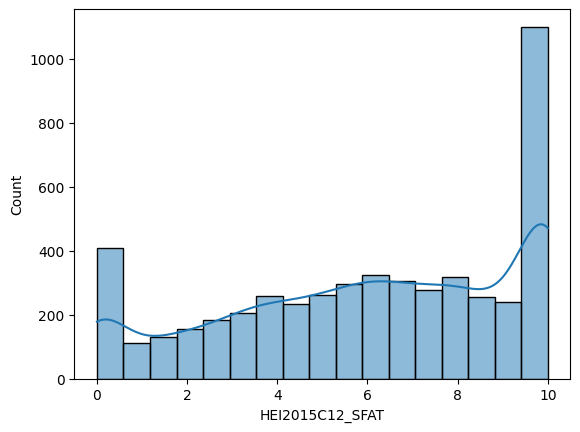

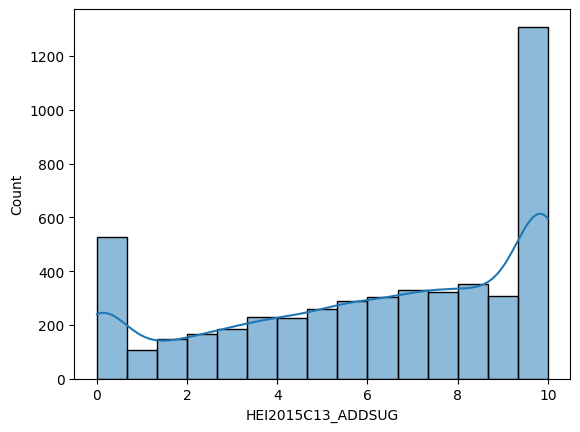

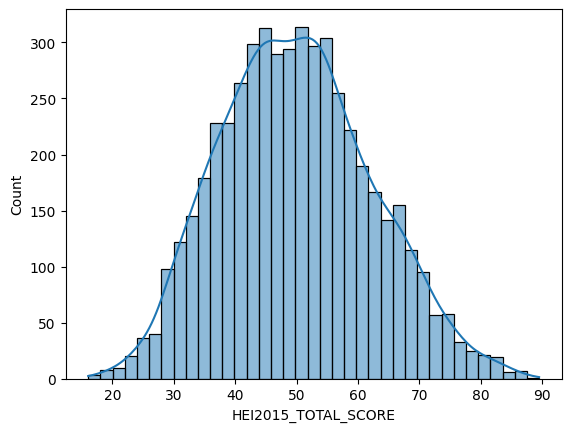

In [21]:
for var in numeric_variable:
  sns.histplot(df1[var], kde=True)
  plt.show()

Note on histograms:
- PHQ-9 Score had a positively skewed distribution. It means that most of the sample has a low probability of presenting a depressive condition.
- Physical Activity Guideline had also positively skewed distribution. It means that most of the sample practices moderate-vigorous activity for a short time each week.
- Healthy eating indices show, in general, bimodal distributions that are focus on the extremes (minimum and maximum). Exceptions: vegetables (25% of the sample is concentrated in the maximum index) and proteins (75% is concentrated in the maximum index).
- the total score of the healthy eating index follows a normal distribution.

### **Categorical Variables Analysis**

Evaluation of aggregated results by categories

In [22]:
df1[categorical_variable].agg(pd.Series.value_counts, normalize=True).fillna(0)

,RIAGENDR,RIDRETH1,DMDEDUC,ADHERENCE,PHQ9_CLASSIFICATION
0.0,0.000000,0.000000,0.000000,0.000000,0.836216
1.0,0.480127,0.212411,0.116035,0.431946,0.101896
2.0,0.519873,0.030746,0.175742,0.156355,0.041884
3.0,0.000000,0.471691,0.250657,0.411699,0.015212
4.0,0.000000,0.243720,0.281262,0.000000,0.004793
5.0,0.000000,0.041432,0.176305,0.000000,0.000000


Construction of bar charts

In [23]:
def bar_chart_cat_var (data, variable):
    (data[[variable]]
     .value_counts(normalize = True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x = variable, y = "Proportion"))
    plt.ylim(0, 1)
    plt.show()

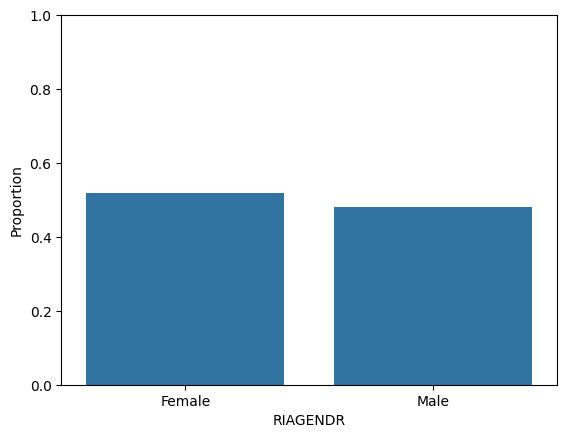

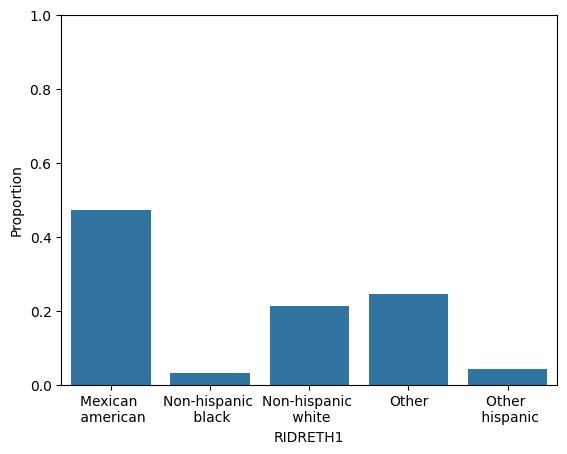

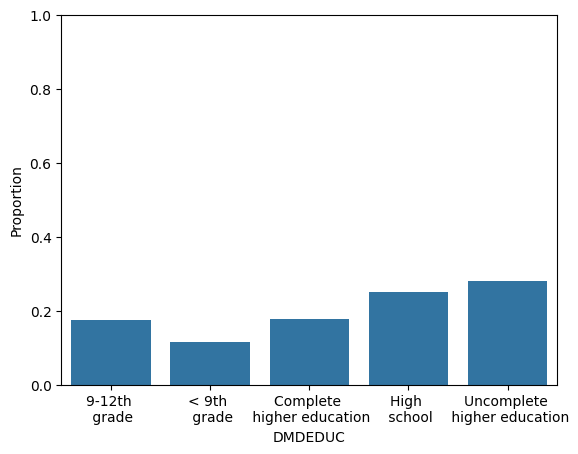

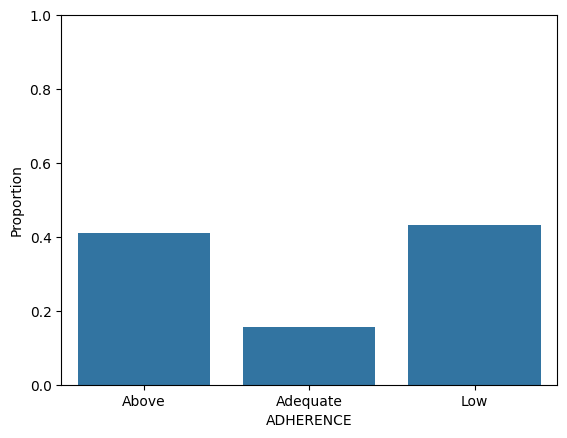

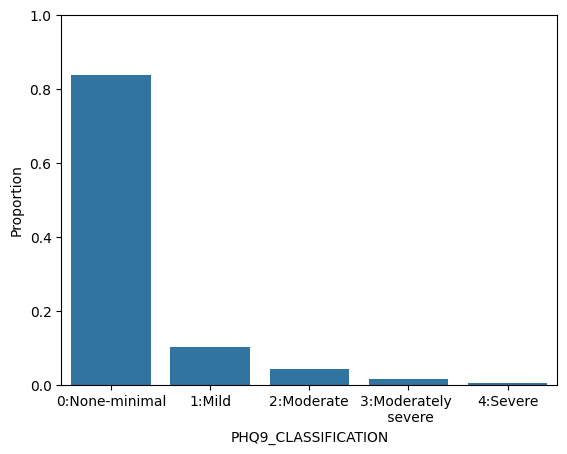

In [24]:
for var in categorical_variable:
    bar_chart_cat_var(df1.replace(label_cat_var), var)
  

Notes on the analysis of categorical variables:
- 47% os the interviewees are "Mexican american". "Non-hispanic blacks" and "other Hispanics" make up less than 5% of responses and could be added to the "Other" category. We would then be left with 3 categories: "Non-hispanic white", "Mexican american" and "other".
- Balanced distribution among levels of education.
- Adherence showed a bimodal behavior: 43% with low adherence and 41% with above adherence.
- 81% of interviewees have minimal depression or have no depression. The unbalanced data set can be a problem.

Changing the variable RIDRETH1 to hold the 3 categories (non-hispanic white, Mexican american, other)

In [25]:
df1['RIDRETH1'] = df1['RIDRETH1'].replace([2, 5], 4)
df1[['RIDRETH1']].value_counts(sort = False)

RIDRETH1
1           1133
3           2516
4           1685
Name: count, dtype: int64

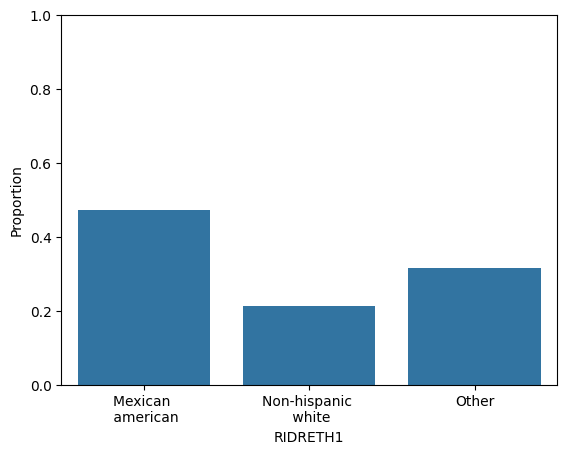

In [26]:
bar_chart_cat_var(df1.replace(label_cat_var), 'RIDRETH1')

### **Bivariate Analysis**

**Analysis of the distribution of numerical variables grouped by PHQ-9 test categories**

In [27]:
for var in numeric_variable:
    if var == 'PHQ9_TOTAL_SCORE':
        continue

    print(var)
    print(df1.groupby('PHQ9_CLASSIFICATION')[var].describe().round(2))

RIDAGEYR
                      count   mean    std   min   25%   50%   75%   max
PHQ9_CLASSIFICATION                                                    
0.0                  4013.0  44.94  19.99  18.0  27.0  42.0  62.0  85.0
1.0                   489.0  43.70  19.67  18.0  26.0  41.0  59.0  85.0
2.0                   201.0  44.42  18.02  18.0  27.0  45.0  57.0  85.0
3.0                    73.0  44.08  17.60  18.0  29.0  46.0  56.0  85.0
4.0                    23.0  42.35  13.24  18.0  32.5  43.0  53.0  64.0
INDFMINC
                      count  mean   std  min  25%  50%   75%   max
PHQ9_CLASSIFICATION                                               
0.0                  3923.0  7.14  3.11  1.0  5.0  7.0  10.0  13.0
1.0                   466.0  6.47  3.09  1.0  4.0  6.0   9.0  13.0
2.0                   198.0  5.67  3.30  1.0  3.0  5.0   8.0  13.0
3.0                    71.0  5.23  2.80  1.0  3.0  5.0   7.0  12.0
4.0                    22.0  4.50  2.82  1.0  3.0  3.0   6.0  12.0
PAG_MINW_

Defining a function to create boxplot graphs

In [28]:
def graph_boxplot(data, variable, label):
    
    if label == "": 
        label = variable
    
    sns.boxplot(x="PHQ9_CLASSIFICATION", y=variable, data=data.replace(label_cat_var))
    plt.ylabel(label)
    plt.show()

Plot boxplot graphs of the numeric variables

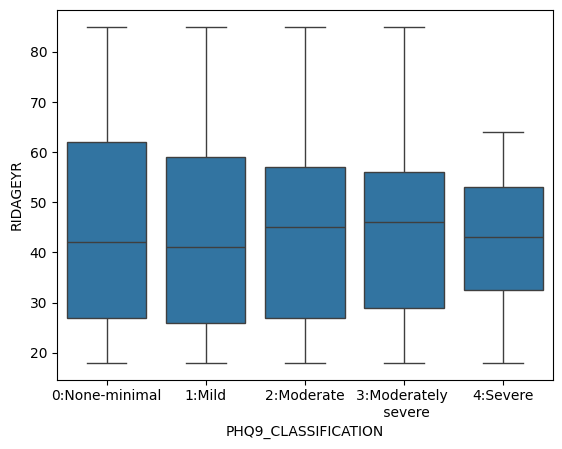

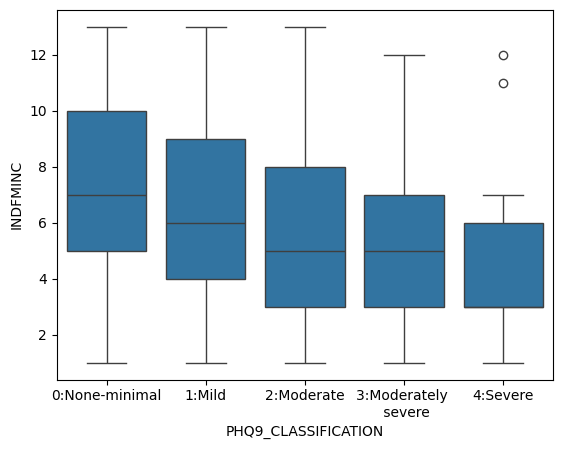

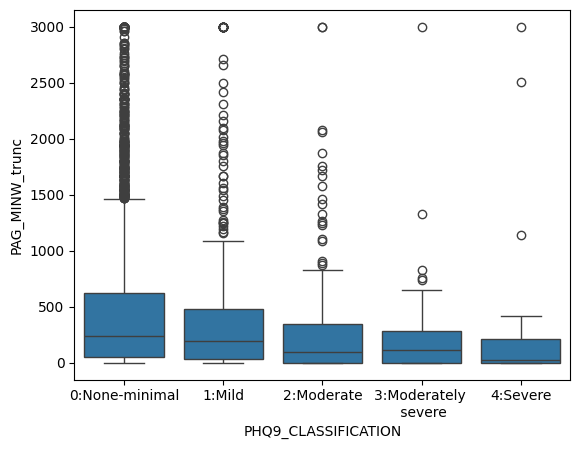

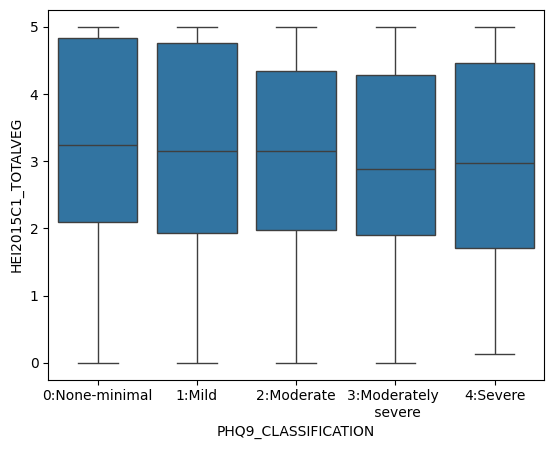

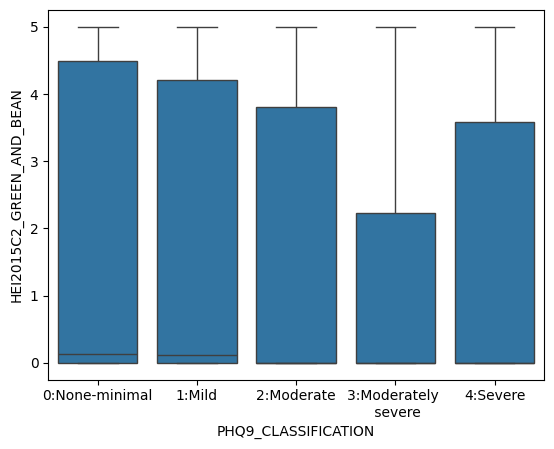

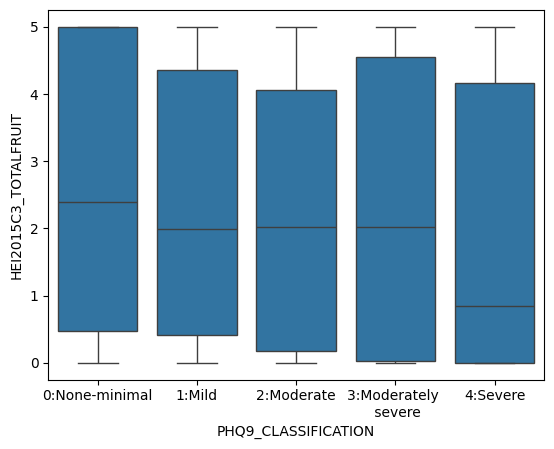

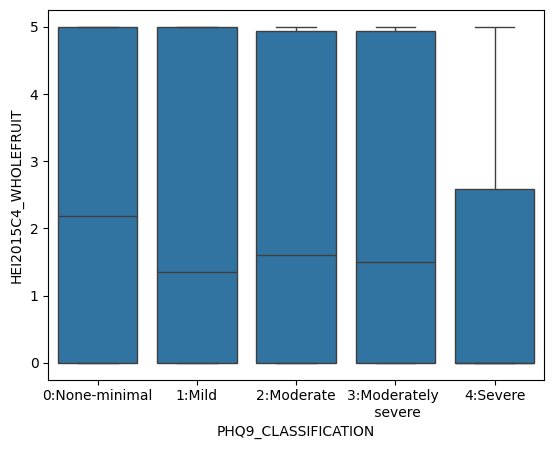

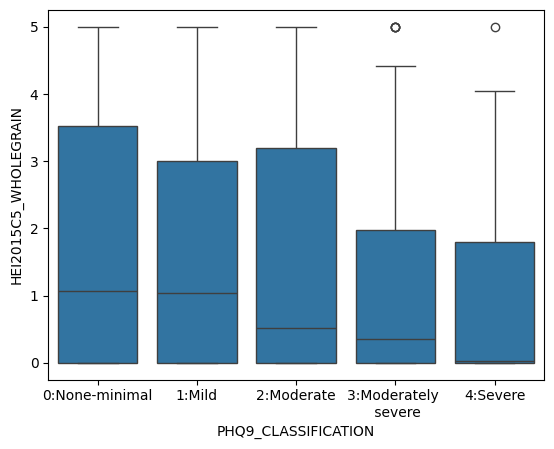

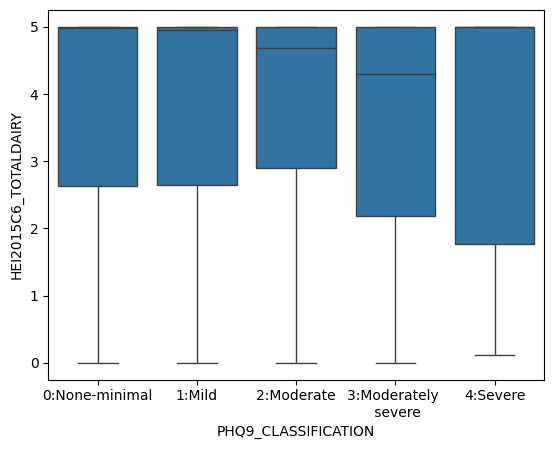

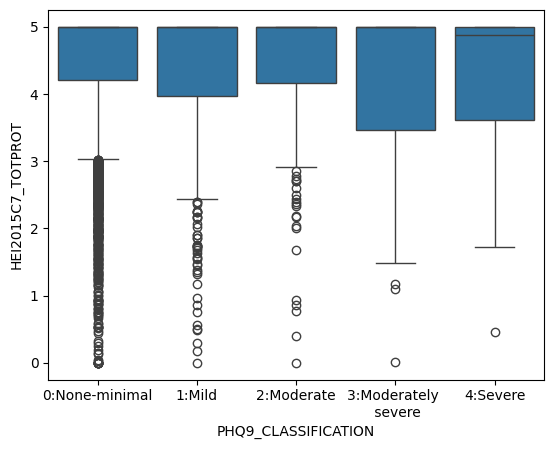

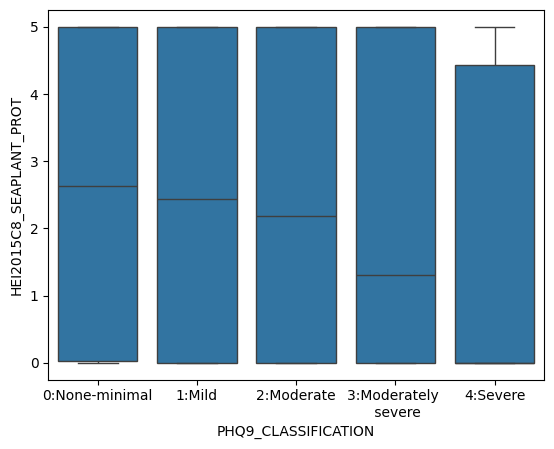

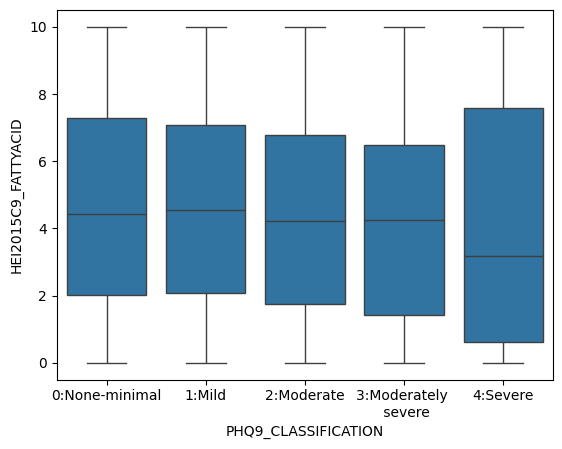

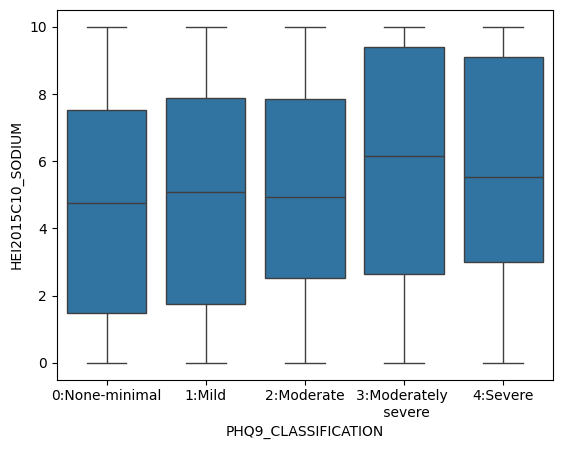

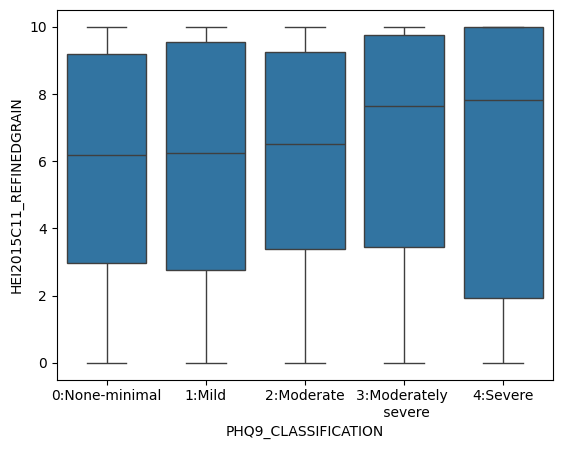

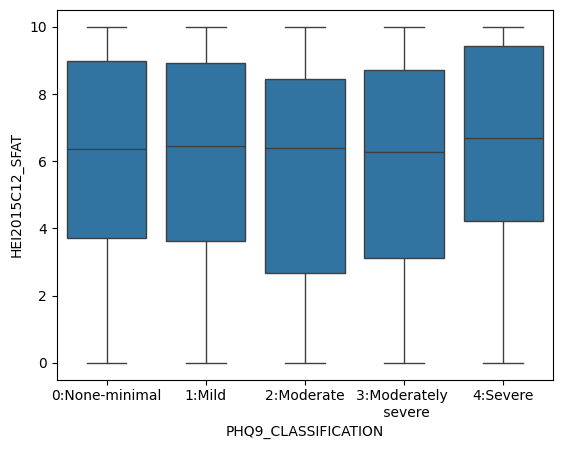

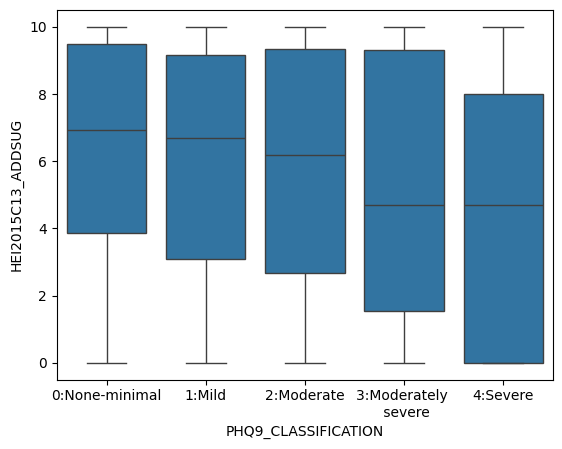

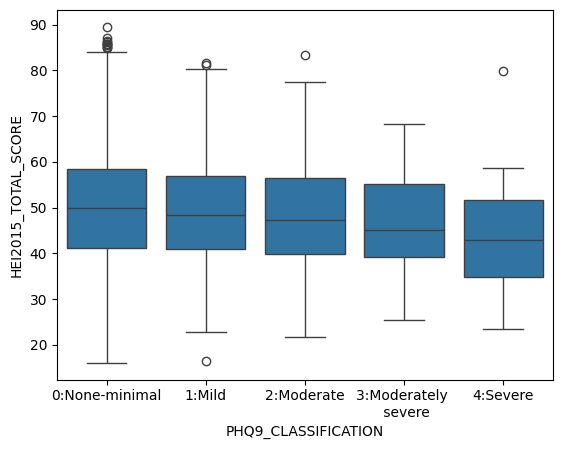

In [29]:
for var in numeric_variable:
    if var == 'PHQ9_TOTAL_SCORE':
        continue

    graph_boxplot(df1, var, "")

Notes:
- The average age of the group with severe depression is lower.
- The annual family income of the group with severe depression is lower. Income appears to decrease with increasing depression scores.
- Groups with moderate and moderately severe depression practice less physical activity.
- People with severe depression appear to have a lower healthy eating index. They eat less fruit, whole grains, sea plants and vegetable proteins.

**Analysis of the distribution of PHQ-9 test categories considering the categorical variables**

Defining a function to plot bar graphs grouped by the PHQ-9 categories

In [30]:
def bar_graph_grp (data, variable):
    (data
     .groupby(variable)['PHQ9_CLASSIFICATION']
     .value_counts(normalize = True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.catplot, "data"), x=variable, y="Proportion", hue = 'PHQ9_CLASSIFICATION', kind="bar"))
    plt.ylim(0,1)
    plt.show()

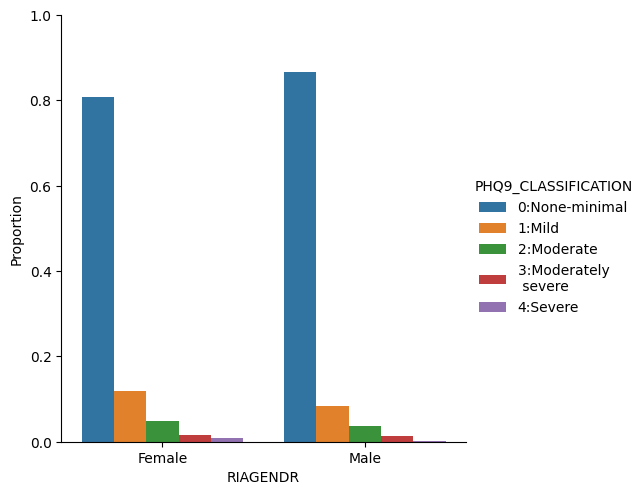

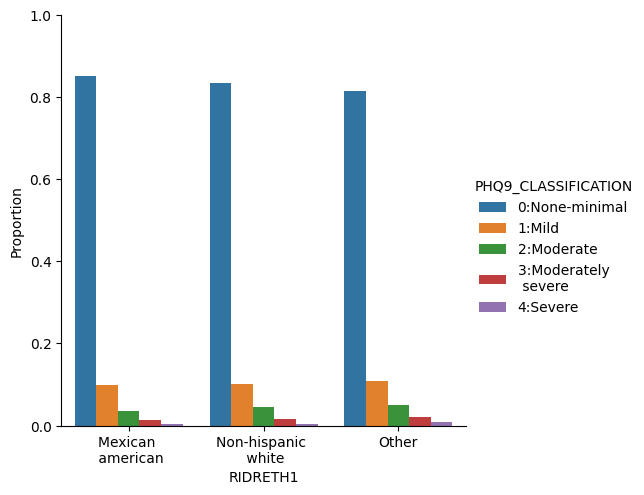

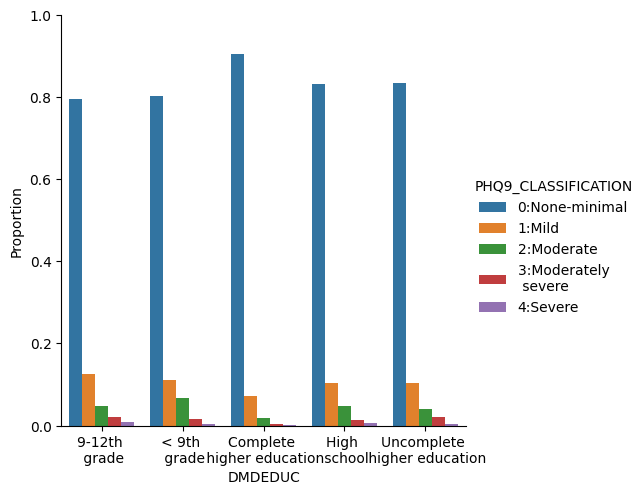

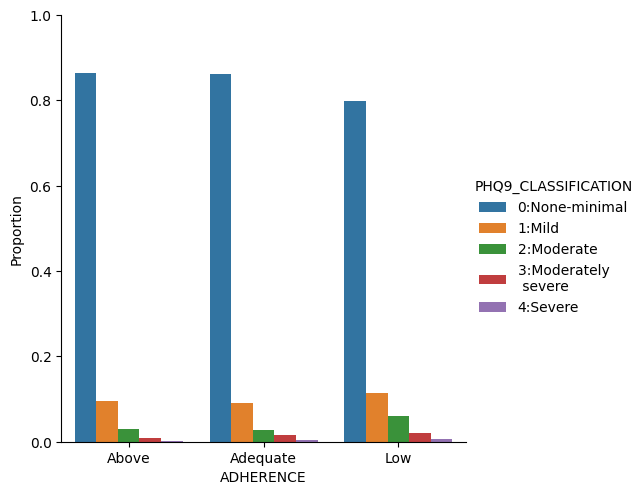

In [31]:
for var in categorical_variable:
    if var == 'PHQ9_CLASSIFICATION':
        continue

    bar_graph_grp(df1.replace(label_cat_var), var)

Notes:
- As previously mentioned, the group with none/minimal depression presents much higher results than the other groups, which makes assessment difficult due to the difference in magnitude.
- Women seem to have a higher proportion of individuals in the mild, moderate and severe depression categories.
- Ethnicity categories do not appear to have any effect on depression outcomes.
- The education level between 9th to 12th grade have a higher proportion of individuals in the moderately severe and severe depression categories. 
- The education level of complete higher education have a higher proportion of people with none/minimal depression.
- The low adherence to physical activity have higher proportions of individuals in the categories of mild, moderate, moderately severe and severe depression.

Based on this assessment, we can describe the **general profile of adult individuals with depressive symptoms in the USA during the period 2005-2006**:
- They are predominantly women.
- The average age of those with moderate depression is 44, while for those with severe depression, it is 42.
- Annual family income tends to decrease as depression severity increases. The group with moderate depression has an annual family income between $20,000 and $24,999, whereas for the group with severe depression, it ranges between $15,000 and $19,999.
- They tend to have lower education levels, typically having completed 9th to 12th grade.
- They engage in less physical activity.
- People with severe depression appear to have a lower healthy eating index. They consume less fruit, whole grains, seafood, and vegetable proteins.
- They consume more refined grains and less added sugar.

### **Statistical Hypothesis Tests**

**1- Is there an association between gender and depression?**

We want to compare the proportions of depression symptoms between genders because we verified that the individuals with depressive symptoms are predominantly women. Since we would like to assess the association between two categorical variables, we use the chi-square test.

**H0**: There is no association between gender and symptoms of depression.

**H1**: There is an association between gender and symptoms of depression.

<ins>First step</ins>: compute a frequency table of the two variables.

In [32]:
contingency_table_ht1 = pd.crosstab(df1.replace(label_cat_var)['RIAGENDR'],
                                     df1.replace(label_cat_var)['PHQ9_CLASSIFICATION'])
contingency_table_ht1

PHQ9_CLASSIFICATION,0:None-minimal,1:Mild,2:Moderate,3:Moderately \n severe,4:Severe
RIAGENDR,,,,,
Female,2011,298,118,41,19
Male,2002,191,83,32,4


<ins>Second step</ins>: compute the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table (contingency_table_ht1).

In [33]:
from scipy.stats import chi2_contingency

stat, p, df, expected = chi2_contingency(contingency_table_ht1)
print('stat = %.3f, p = %.3f' % (stat, p))

stat = 34.084, p = 0.000


We can observe that the **p < 0.05** (p = 0.000). This means that the probability of observing the differences in the sample is really low if the null hypothesis is true, therefore, we have evidence to reject this hypothesis.\
**Thus, we can conclude that there is an association between gender and the depression level, because the prevalences are different in men and women, being higher in women.**

<ins>Third step</ins>: compute the standardized residuals.

In [34]:
table = sm.stats.Table(contingency_table_ht1)
table.standardized_resids

PHQ9_CLASSIFICATION,0:None-minimal,1:Mild,2:Moderate,3:Moderately \n severe,4:Severe
RIAGENDR,,,,,
Female,-5.360539,4.257759,1.995246,0.74801,2.961903
Male,5.360539,-4.257759,-1.995246,-0.74801,-2.961903


In order to check in which cells of the table the observed frequency (i.e., the prevalence of depressive symptoms) differed statistically from the expected frequency (if there were no association between depressive symptoms and gender), we can evaluate the standardized residuals. We will consider residuals outside the interval [-1.96; 1.96] to be statistically significant (95% confidence).\
**Based on this, the differences between gender are significant for all the depression levels, excepted the moderately severe.**

<ins>Fourth step</ins>: it is also important to verify the power of the effect between the variables because in large samples the p-value can be small even when the differences among the classification are irrelevant.\
We can calculate the degree of association between two categorical variables employing the Cramer's V value. A value of 1.0 indicates perfect association, and 0.0 means the variables have no association.

In [35]:
from scipy.stats import contingency

contingency.association(contingency_table_ht1, method='cramer')

0.08427495336809024

This result shows that **the gender has a small significative effect on the depresison levels**, confirming the conclusions made before.

**2- Is there an association between age and depression?**

In this case we want to compare the average age for the five depression levels because we observed that the average age of those with moderate depression is 44, while for those with severe depression it is 42. Since we want to compare the means of more than two independent groups, the one-way ANOVA test will be used.

**H0**: There is no difference among the depression levels regarding the average age.

**H1**: There is at least one difference in average age among the depression levels.

In [36]:
from scipy.stats import f_oneway

df_aux = df1[["PHQ9_CLASSIFICATION", "RIDAGEYR"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["RIDAGEYR"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["RIDAGEYR"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["RIDAGEYR"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["RIDAGEYR"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["RIDAGEYR"],)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.558, p=0.693


The **low result of the F-value** (0.558) and the **p-value > 0.05** (p = 0.693) indicate that the difference that we observe in the sample has a high probability of happening if the null hypothesis is true. Thus, we have no evidence to reject the hypothesis. Based on this, **we can conclude that there is non statistic difference among the people average age of the different depression levels**.

For the ANOVA test to be valid, we need to check whether the data meets the assumption of normality by analysis group. To do this, we will use the Shapiro-Wilk test.

In [37]:
from scipy.stats import shapiro

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["RIDAGEYR"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 0, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["RIDAGEYR"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 1, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["RIDAGEYR"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 2, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["RIDAGEYR"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 3, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["RIDAGEYR"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 4, stat=%.3f' % (res.statistic))

PHQ9_CLASSIFICATION == 0, stat=0.938
PHQ9_CLASSIFICATION == 1, stat=0.935
PHQ9_CLASSIFICATION == 2, stat=0.959
PHQ9_CLASSIFICATION == 3, stat=0.953
PHQ9_CLASSIFICATION == 4, stat=0.965


All the statistics are close to 1. Thus, the samples drawn from a normal distribution and the ANOVA test can be used.

The ANOVA test also assumes that variances are equal between groups. Bartlett's test can be used to check this assumption.

In [38]:
from scipy.stats import bartlett

test0 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["RIDAGEYR"]
test1 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["RIDAGEYR"]
test2 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["RIDAGEYR"]
test3 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["RIDAGEYR"]
test4 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["RIDAGEYR"]

stat, p = bartlett(test0, test1, test2, test3, test4)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=11.427, p=0.022


As the p-value is “small” (p < 0.05) - that is, there is a low probability of sampling data from distributions with identical variances that produces such an extreme value of the statistic - this may be taken as evidence against the null hypothesis in favor of the alternative: the variances of the groups are not equal. Thus, the ANOVA test should be used with caution in this case.

**3- Are the average family incomes the same for the five depression groups?**

We verified earlier that the annual family income tends to decrease as depression severity increases. The group with moderate depression has an annual family income between $20,000 and $24,999, whereas for the group with severe depression, it ranges between $15,000 and $19,999. Let's analyze if these differences have statistical meaning.

In this case we want to compare the average annual family income for the five depression levels. Since we want to compare the means of more than two independent groups, the one-way ANOVA test will be used.

**H0**: There is no difference among the depression levels regarding the average annual family income.

**H1**: There is at least one difference in average annual family income among the depression levels.

In [39]:
from scipy.stats import f_oneway

df_aux = df1[["PHQ9_CLASSIFICATION", "INDFMINC"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["INDFMINC"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["INDFMINC"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["INDFMINC"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["INDFMINC"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["INDFMINC"],)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=23.665, p=0.000


The **high result of the F-value** (23.665) and the **p-value < 0.05** (p = 0.000) indicate that the difference that we observe in the sample has a low probability of happening if the null hypothesis is true. Thus, we have evidence to reject the hypothesis. Based on this, **we can conclude that there is at least one difference among the different depression levels regarding the average annual family income**.

Since the One-way ANOVA only tells us that there is at least one difference among the symptom groups in relation to average income, we will perform multiple comparisons to investigate which differences are significant.

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df_aux["INDFMINC"],
                  df_aux['PHQ9_CLASSIFICATION'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.6753 0.0001 -1.0915 -0.2591   True
   0.0    2.0  -1.4692    0.0  -2.088 -0.8505   True
   0.0    3.0  -1.9156    0.0 -2.9328 -0.8984   True
   0.0    4.0   -2.641 0.0007 -4.4571 -0.8249   True
   1.0    2.0  -0.7939 0.0223 -1.5146 -0.0733   True
   1.0    3.0  -1.2403 0.0153 -2.3225 -0.1581   True
   1.0    4.0  -1.9657 0.0313  -3.819 -0.1124   True
   2.0    3.0  -0.4464 0.8384 -1.6214  0.7287  False
   2.0    4.0  -1.1717 0.4496 -3.0807  0.7373  False
   3.0    4.0  -0.7254 0.8751 -2.7981  1.3474  False
----------------------------------------------------


With multiple comparisons, we are performing ten hypothesis tests simultaneously. Because of this, the function adjusts the p-value so that the maximum error of this hypothesis test set is alpha = 0.05.

Based on the results, We have evidence that:

1. The average income of the group with no symptoms is different from the average income of the groups with mild, moderate, moderately severe and severe symptoms.
2. The average income of the group with mild symptoms is different from the average income of the groups with moderate, moderately severe and severe symptoms.

However, we have no evidence that:

1. The average income of the group with moderate symptoms is different from the average income of the groups with moderately severe and severe symptoms.
2. The average income of the group with moderately severe symptoms is different from the average income of the groups with severe symptoms.

In these cases, we cannot reject the null hypothesis and the differences among theses groups are not statistically significant.

We also conduct Shapiro-Wilk and Bartlet tests do verify if ANOVA test can be used.

In [41]:
from scipy.stats import shapiro

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["INDFMINC"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 0, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["INDFMINC"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 1, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["INDFMINC"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 2, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["INDFMINC"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 3, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["INDFMINC"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 4, stat=%.3f' % (res.statistic))

PHQ9_CLASSIFICATION == 0, stat=0.936
PHQ9_CLASSIFICATION == 1, stat=0.954
PHQ9_CLASSIFICATION == 2, stat=0.906
PHQ9_CLASSIFICATION == 3, stat=0.944
PHQ9_CLASSIFICATION == 4, stat=0.844


All the statistics are close to 1. Thus, the samples drawn from a normal distribution and the ANOVA test can be used.

In [42]:
from scipy.stats import bartlett

test0 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["INDFMINC"]
test1 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["INDFMINC"]
test2 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["INDFMINC"]
test3 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["INDFMINC"]
test4 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["INDFMINC"]

stat, p = bartlett(test0, test1, test2, test3, test4)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=3.329, p=0.504


Since the p-value is greater than 0.05, we cannot reject the null hypothesis. In other words, we do not have enough evidence to say that the groups have different variances. Based on this, the ANOVA test can be used.

**4- Are the healthy eating index the same for the five depression groups?**

People with severe depression appear to have a lower healthy eating index. We want to compare the average healthy eating index among the five depression levels. Since we want to compare the means of more than two independent groups, the one-way ANOVA test will be used.

**H0**: There is no difference among the depression levels regarding the average healthy eating index.

**H1**: There is at least one difference in average healthy eating index among the depression levels.

In [43]:
df_aux = df1[["PHQ9_CLASSIFICATION", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["HEI2015_TOTAL_SCORE"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["HEI2015_TOTAL_SCORE"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["HEI2015_TOTAL_SCORE"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["HEI2015_TOTAL_SCORE"],
                   df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["HEI2015_TOTAL_SCORE"],)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.231, p=0.002


The statistic value do not allow any conclusion. However, the **p-value < 0.05** (p = 0.002) indicate that the difference that we observe in the sample has a low probability of happening if the null hypothesis is true. Thus, we have evidence to reject the hypothesis and there is at least one difference among the different depression levels regarding the average healthy eating index.

Since the One-way ANOVA only tells us that there is at least one difference among the symptom groups in relation to average income, we will perform multiple comparisons to investigate which differences are significant.

In [44]:
tukey = pairwise_tukeyhsd(df_aux["HEI2015_TOTAL_SCORE"],
                  df_aux['PHQ9_CLASSIFICATION'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1066 0.3464  -2.7413  0.528  False
   0.0    2.0  -1.8512 0.2457   -4.324 0.6216  False
   0.0    3.0  -3.5486  0.114  -7.5749 0.4776  False
   0.0    4.0  -5.7943 0.1622 -12.8258 1.2373  False
   1.0    2.0  -0.7446 0.9545  -3.6104 2.1213  False
   1.0    3.0   -2.442  0.525  -6.7209 1.8369  False
   1.0    4.0  -4.6876 0.3843 -11.8668 2.4916  False
   2.0    3.0  -1.6974 0.8585  -6.3613 2.9664  False
   2.0    4.0  -3.9431 0.5945 -11.3582  3.472  False
   3.0    4.0  -2.2456  0.942 -10.3128 5.8216  False
----------------------------------------------------


Based on the results, We have no evidence that the average healthy eating index are different among the groups, because all p-values are higher than 0.05.

Thus, we have conflicting results: the ANOVA test indicates that there is at least one difference between the groups, but the multiple comparison test shows that there is no evidence for this difference.

Let's verify if the ANOVA test could be used in this case by computing **Shapiro-Wilk and Bartlett's tests**. For the first case, we observed statistics values close to 1, which indicates that the samples follow a normal distribution. 

In [45]:
from scipy.stats import shapiro

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["HEI2015_TOTAL_SCORE"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 0, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["HEI2015_TOTAL_SCORE"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 1, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["HEI2015_TOTAL_SCORE"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 2, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["HEI2015_TOTAL_SCORE"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 3, stat=%.3f' % (res.statistic))

test = df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["HEI2015_TOTAL_SCORE"]
res = shapiro(test)
print('PHQ9_CLASSIFICATION == 4, stat=%.3f' % (res.statistic))

PHQ9_CLASSIFICATION == 0, stat=0.994
PHQ9_CLASSIFICATION == 1, stat=0.994
PHQ9_CLASSIFICATION == 2, stat=0.988
PHQ9_CLASSIFICATION == 3, stat=0.977
PHQ9_CLASSIFICATION == 4, stat=0.951


The Bartlett's test presented a **statistic of 7.414** and a **p-value of 0.116**. Based on this, we do not have enough evidence that the groups have different variances and **the ANOVA test can be used**.

In [46]:
from scipy.stats import bartlett

test0 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 0)]["HEI2015_TOTAL_SCORE"]
test1 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 1)]["HEI2015_TOTAL_SCORE"]
test2 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 2)]["HEI2015_TOTAL_SCORE"]
test3 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 3)]["HEI2015_TOTAL_SCORE"]
test4 = df_aux[(df_aux.PHQ9_CLASSIFICATION == 4)]["HEI2015_TOTAL_SCORE"]

stat, p = bartlett(test0, test1, test2, test3, test4)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=7.414, p=0.116


In conclusion, despite confirming the validity of the ANOVA test, **it was not possible to find conclusive results** on the relation between the average healthy eating index and the depression levels.

**5- Are the adherence to physical activity the same for all five depression groups?**

We verified that the individuals with depressive symptoms engage less in physical activity. Thus, we want to compare the adherence to physical activity among the depression levels. The null and alternative hypothesis are:

**H0**: There is no difference among the depression levels regarding the adherence to physical activity.

**H1**: There is at least one difference in adherence on physical activity among the depression levels.


Let's compute a frequency table of the three variables.

In [47]:
contingency_table_ht5 = pd.crosstab(df1.replace(label_cat_var)['ADHERENCE'],
                                     df1.replace(label_cat_var)['PHQ9_CLASSIFICATION'])
contingency_table_ht5

PHQ9_CLASSIFICATION,0:None-minimal,1:Mild,2:Moderate,3:Moderately \n severe,4:Severe
ADHERENCE,,,,,
Above,1759,192,59,18,5
Adequate,647,69,20,12,3
Low,1607,228,122,43,15


As we verified in the Exploratory Data Analysis that the population is not normally distributed, we will use the Kruskal-Wallis H-test for independent samples.

In [50]:
from scipy.stats import kruskal

stat, p = kruskal(contingency_table_ht5[contingency_table_ht5.ADHERENCE == "Above"]["PHQ9_CLASSIFICATION"],
                   contingency_table_ht5[(contingency_table_ht5.ADHERENCE == "Adequate")]["PHQ9_CLASSIFICATION"],
                   contingency_table_ht5[(contingency_table_ht5.ADHERENCE == "Low")]["PHQ9_CLASSIFICATION"])

print('stat=%.3f, p=%.3f' % (stat, p))

AttributeError: 'DataFrame' object has no attribute 'ADHERENCE'